In [1]:
# Import pandas and seaborn packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

import statistics
from scipy.stats import shapiro
import scipy.stats as stats
from scipy.stats import mannwhitneyu
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)
from termcolor import colored


In [2]:
# Load the data.

### YOUR CODE HERE ### 

data = pd.read_csv('didi.csv')

# Display the first five rows.

### YOUR CODE HERE ### 

data.head()

,Month,Passenger ID,Passenger Group,Test group,Trips
0,July,800000,Medium,Loyalty,6
1,July,800001,Low,Control,0
2,July,800002,Medium,Loyalty,6
3,July,800003,Medium,Control,5
4,July,800004,Low,Loyalty,0


In [4]:
# Check how many rides are each Group
data["Passenger Group"].value_counts()

Passenger Group
Medium    9598
Low       7834
High      2566
Name: count, dtype: int64

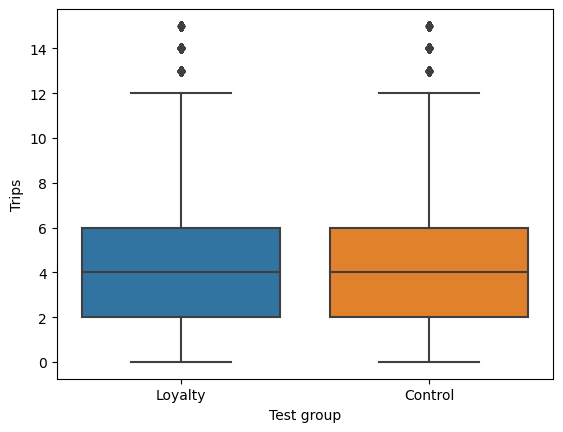

In [5]:
# Create a boxplot with group and rides.

### YOUR CODE HERE ### 

sns.boxplot(x = "Test group", y = "Trips", data = data);

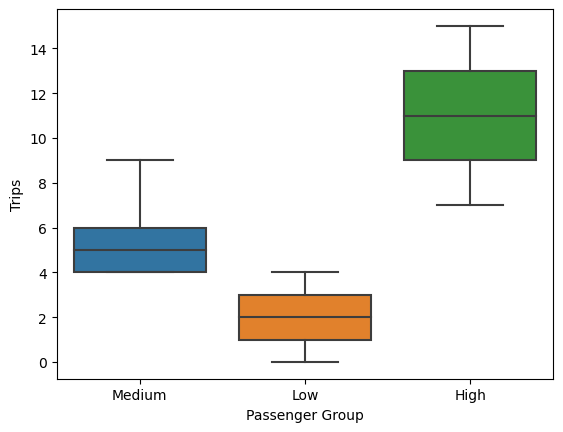

In [6]:
# Create a boxplot with Influencer and Sales.

### YOUR CODE HERE ### 

sns.boxplot(x = "Passenger Group", y = "Trips", data = data);

In [7]:
# Drop rows that contain missing data and update the DataFrame.

### YOUR CODE HERE ### 

data = data.dropna(axis=0)


# Confirm the data contain no missing values.

### YOUR CODE HERE ### 

data.isnull().sum(axis=0)

Month              0
Passenger ID       0
Passenger Group    0
Test group         0
Trips              0
dtype: int64

In [8]:
# Renombrar columnas
data = data.rename(columns={'Test group': 'Test_group', 'Passenger Group': 'Passenger_Group'})

 A/B Testing for Trips  

Summary Statistics by Groups for Trips 

Trips
Test_group      Control       Loyalty
count       9998.000000  10000.000000
mean           4.732046      4.832900
std            3.293049      3.407571
median         4.000000      4.000000
min            0.000000      0.000000
max           15.000000     15.000000 

Histogram by Groups for Trips 



C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


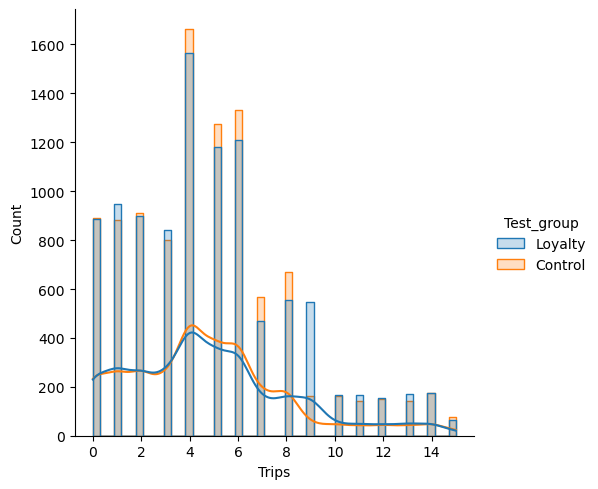

C:\Users\leop_\AppData\Local\Temp\ipykernel_22084\1276768262.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data[x] , color="skyblue", label="GroupA")
C:\Users\leop_\AppData\Local\Temp\ipykernel_22084\1276768262.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( data[x] , color="red", 

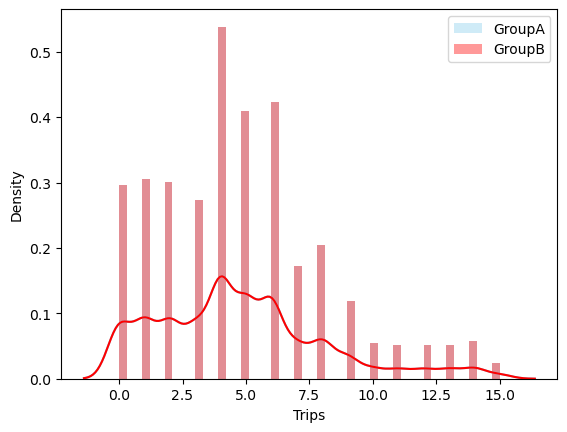

In [9]:
variables = ["Trips"]

for x in variables:
    print(colored(" A/B Testing for ","cyan", attrs=["bold",'reverse', 'blink'])+colored(x+" ","cyan", attrs=["bold",'reverse', 'blink']),"\n")
    print(colored("Summary Statistics by Groups for "+x,"cyan", attrs=["bold"]),"\n")
    result3 = data.groupby("Test_group")[x].aggregate(["count","mean","std","median","min",max])
    result4 = result3.transpose()
    print(x)
    print(result4,"\n")
    print(colored("Histogram by Groups for "+x,"cyan", attrs=["bold"]),"\n")
    sns.displot(data, x=x, hue="Test_group", element="step", kde=True)
    plt.show()
    sns.distplot( data[x] , color="skyblue", label="GroupA")
    sns.distplot( data[x] , color="red", label="GroupB")
    plt.legend()
    plt.show()

    

Box Plot by Groups for Trips 



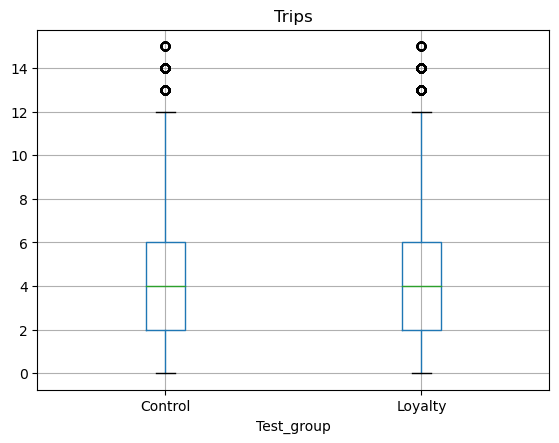

In [25]:
              
        data.boxplot(column=[x], by="Test_group",return_type=None)
        plt.suptitle("")
        print(colored("Box Plot by Groups for "+x,"cyan", attrs=["bold"]),"\n")
        plt.show()

In [ ]:

#Importing the Datasets: Two sets are stored in different sheets of excel
#DataGroupA = pd.read_excel("../input/ab-testing-data/ab_testing_data.xlsx" , sheet_name= "Control Group")
#DataGroupB = pd.read_excel("../input/ab-testing-data/ab_testing_data.xlsx" , sheet_name= "Test Group")

#Feature Engineering: Conversion Rate
#DataGroupA["Conversion Rate"] = DataGroupA["Purchase"]/DataGroupA["Click"]*100
#DataGroupB["Conversion Rate"] = DataGroupB["Purchase"]/DataGroupB["Click"]*100

#Feature Engineering: Earning per Purchase
#DataGroupA["Earning per Purchase"] = DataGroupA["Earning"]/DataGroupA["Purchase"]*100
#DataGroupB["Earning per Purchase"] = DataGroupB["Earning"]/DataGroupB["Purchase"]*100

#Data Manipulation: Indication of Groups in A New Variable
#DataGroupA["Group"] = "GroupA"
#DataGroupB["Group"] = "GroupB"

#Combining the Datasets
#Data = pd.concat([DataGroupA, DataGroupB], ignore_index=True)
#3. A/B Testing in Practice 


#variables = ["Impression","Click","Purchase","Earning","Conversion Rate","Earning per Purchase"]

        
        print(colored("1. Step: Testing the Normality Assumption for "+x,"cyan", attrs=["bold"]),"\n")
        Loyalty_shaphiro_w, Loyalty_shaphiro_p = shapiro(Loyalty[x])
        Control_shaphiro_w, Control_shaphiro_p = shapiro(Cotrol[x])
        print("GroupA_shaphiro_p = %.3f, GroupB_shaphiro_p = %.3f" % (GroupA_shaphiro_p, GroupB_shaphiro_p),"\n")
    
        if Passenger Group > 0.05 and Control_shaphiro_p > 0.05: 
            print("Shaphiro Wilk Test resulted as p > .05 for GroupA and GroupB which indicates that H0 can NOT be rejected. " 
                  "Accordingly distribution of "+x+" values in"+" GroupA and GroupB are likely to normal distribution.","\n")
            return 1
        elif GroupA_shaphiro_p < 0.05 and GroupB_shaphiro_p < 0.05:
            print("Shaphiro Wilk Test resulted as p < .05 for GroupA and GroupB which indicates that H0 is rejected. " 
                  "Accordingly distribution of "+x+" values in"+" GroupA and GroupB are not likely to normal distribution.","\n")
            return 2
        elif GroupA_shaphiro_p > 0.05 and GroupB_shaphiro_p < 0.05:
            print("Pay Attention!: Shaphiro Wilk Test resulted as p > .05 for GroupA while p < .05 for GroupB which indicates that H0 is rejected for GroupB. " 
                  "Accordingly you can check if the "+x+" values in"+" GroupB contain outlier or not","\n")
            return 3
        else :
            print("Pay Attention!: Shaphiro Wilk Test resulted as p > .05 for GroupB while p < .05 for GroupA which indicates that H0 is rejected for GroupA. " 
                "Accordingly you can check if the "+x+" values in"+" GroupA contain outlier or not","\n")
            return 4

    result = normald()
    if result == 1:
        
            print(colored("2. Step: Testing the Homogeneity Assumption for "+x,"cyan", attrs=["bold"]),"\n")
            levene_F, levene_p = stats.levene(DataGroupA[x], DataGroupB[x])
            print("levene_F = %.3f, levene_p = %.3f" % (levene_F, levene_p),"\n")       
            if levene_p > 0.05:
                print("Levene's Test for Homogeneity resulted as p > .05 which indicates that H0 can NOT be rejected."
                      " Accordingly variances of GroupA and GroupB are equal.","\n")
                print(colored("3. Step: Alternative 1 -> Independent Samples t Test for "+x,"cyan", attrs=["bold"]),"\n")
                t_value, t_test_p = stats.ttest_ind(DataGroupA[x], DataGroupB[x], equal_var=True)
                print("t_value = %.3f, t_test_p = %.3f" % (t_value, t_test_p),"\n")
                if t_test_p > 0.05:
                    print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                          " Accordingly there is no significant difference between GroupA and GroupB in "+x+" values.","\n")
                else: 
                    print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected."
                          " Accordingly there is a significant difference between GroupA and GroupB in "+x+" values.","\n")
                    if statistics.mean(DataGroupA["Earning"]) > statistics.mean(DataGroupB["Earning"]):
                        print("Mean of GroupA in "+x+" is greater than GroupB","\n")
                    else:
                        print("Mean of GroupB in "+x+" is greater than GroupA","\n")
            else : 
                print("Levene's Test for Homogeneity resulted as p < .05 which indicates that H0 is rejected."
                      " Accordingly variances of GroupA and GroupB are not equal.","\n")
                print(colored("3. Step: Alternative 1 -> Independent Samples t Test for "+x,"cyan", attrs=["bold"]),"\n")
                t_value, t_test_p = stats.ttest_ind(DataGroupA[x], DataGroupB[x], equal_var=False)
                print('t_value = %.3f, t_test_p = %.3f' % (t_value, t_test_p),"\n")
                if t_test_p > 0.05:
                    print("Independent Samples t Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                          " Accordingly there is no significant difference between GroupA and GroupB in "+x+" values.","\n")
                else: 
                    print("Independent Samples t Test resulted as p < .05 which indicates that H0 is rejected."
                          " Accordingly there is a significant difference between GroupA and GroupB in "+x+" values.","\n")
                    if statistics.mean(DataGroupA[x]) > statistics.mean(DataGroupB[x]):
                        print("Mean of GroupA in "+x+" is greater than GroupB","\n")
                    else:
                        print("Mean of GroupB in "+x+" is greater than GroupA","\n")
                    
                    
    elif result == 2 or result == 3 or result == 4:
        
            print(colored("3. Step: Alternative 2 -> Mann-Whitney U Test for "+x,"cyan", attrs=["bold"]),"\n")
            u_value, mannw_test_p = mannwhitneyu(DataGroupA[x], DataGroupB[x])
            print('u_value=%.3f, mannw_test_p=%.3f' % (u_value, mannw_test_p),"\n")
            if mannw_test_p > 0.05:
                print("Mann Whitney U Test resulted as p > .05 which indicates that H0 can NOT be rejected."
                      " Accordingly there is no significant difference between GroupA and GroupB in distributions of "+x+" values.","\n")
            else: 
                print("Mann Whitney U Test resulted as p < .05 which indicates that H0 is rejected."
                      " Accordingly there is a significant difference between GroupA and GroupB in distributions of "+x+" values.","\n")
                if statistics.median(DataGroupA["Earning"]) > statistics.median(DataGroupB["Earning"]):
                    print("Median of GroupA in "+x+" is greater than GroupB","\n")
                else:
                    print("Median of GroupB in "+x+" is greater than GroupA","\n")
    else :
            print("Something is wrong. Check your data!")


In [10]:
data.head()

,Month,Passenger ID,Passenger_Group,Test_group,Trips
0,July,800000,Medium,Loyalty,6
1,July,800001,Low,Control,0
2,July,800002,Medium,Loyalty,6
3,July,800003,Medium,Control,5
4,July,800004,Low,Loyalty,0


In [11]:


# Definir el modelo ANOVA de dos factores
model = ols("Trips ~ C() + C(Passenger_Group) + C(Test_group):C(Passenger_Group)", data=data).fit()


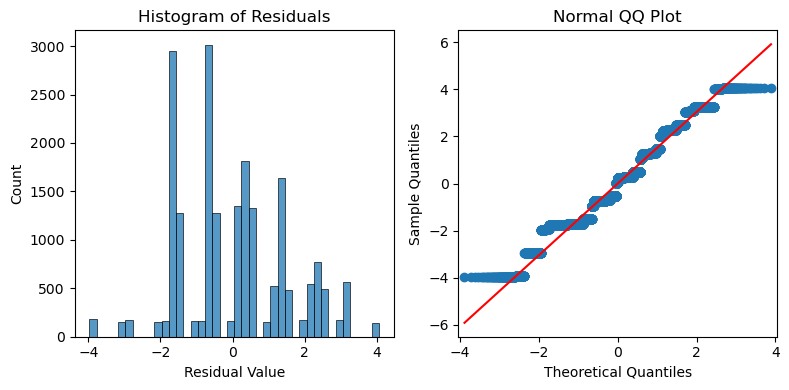

In [12]:
# Calculate the residuals.

### YOUR CODE HERE ### 

residuals = model.resid

# Create a 1x2 plot figure.
fig, axes = plt.subplots(1, 2, figsize = (8,4))

# Create a histogram with the residuals.

### YOUR CODE HERE ### 

sns.histplot(residuals, ax=axes[0])

# Set the x label of the residual plot.
axes[0].set_xlabel("Residual Value")

# Set the title of the residual plot.
axes[0].set_title("Histogram of Residuals")

# Create a QQ plot of the residuals.

### YOUR CODE HERE ### 

sm.qqplot(residuals, line='s',ax = axes[1])

# Set the title of the QQ plot.
axes[1].set_title("Normal QQ Plot")

# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()

# Show the plot.
plt.show()


In [25]:
# Realizar la prueba de Shapiro-Wilk en cada grupo
for group in data['Test_group'].unique():
    stat, p_value = shapiro(data[data['Test_group'] == group]['Trips'])
    print(f'Grupo {group}: estadístico={stat:.4f}, p-valor={p_value:.4f}')
    if p_value > 0.05:
        print(f'No se rechaza la normalidad en el grupo {group}.')
    else:
        print(f'Se rechaza la normalidad en el grupo {group}.')

Grupo Loyalty: estadístico=0.9415, p-valor=0.0000
Se rechaza la normalidad en el grupo Loyalty.
Grupo Control: estadístico=0.9344, p-valor=0.0000
Se rechaza la normalidad en el grupo Control.


C:\ProgramData\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [26]:

from scipy.stats import kruskal

# Realizar la prueba de Kruskal-Wallis
stat, p_value = kruskal(
    data[data['Controlgroup'] == 'ControlHigh']['Trips'],
    data[data['Controlgroup'] == 'ControlLow']['Trips'],
    data[data['Controlgroup'] == 'ControlMedium']['Trips'],
    data[data['Controlgroup'] == 'LoyaltyHigh']['Trips'],
    data[data['Controlgroup'] == 'LoyaltyLow']['Trips'],
    data[data['Controlgroup'] == 'LoyaltyMedium']['Trips']
)

print(f'Estadístico de Kruskal-Wallis: {stat:.4f}, p-valor: {p_value:.4f}')

if p_value < 0.05:
    print("Hay diferencias significativas entre los grupos.")
else:
    print("No se encontraron diferencias significativas entre los grupos.")

Estadístico de Kruskal-Wallis: 16006.7919, p-valor: 0.0000
Hay diferencias significativas entre los grupos.


In [28]:
import scikit_posthocs as sp

# Realizar la prueba de Dunn con corrección de Bonferroni
posthoc = sp.posthoc_dunn(data, val_col='Trips', group_col='Controlgroup', p_adjust='bonferroni')
print(posthoc)



                 ControlHigh  ControlLow  ControlMedium    LoyaltyHigh  \
ControlHigh     1.000000e+00         0.0  1.512930e-241   1.000000e+00   
ControlLow      0.000000e+00         1.0   0.000000e+00   0.000000e+00   
ControlMedium  1.512930e-241         0.0   1.000000e+00  8.401158e-248   
LoyaltyHigh     1.000000e+00         0.0  8.401158e-248   1.000000e+00   
LoyaltyLow      0.000000e+00         1.0   0.000000e+00   0.000000e+00   
LoyaltyMedium  2.854909e-213         0.0   4.307224e-02  7.258980e-219   

               LoyaltyLow  LoyaltyMedium  
ControlHigh           0.0  2.854909e-213  
ControlLow            1.0   0.000000e+00  
ControlMedium         0.0   4.307224e-02  
LoyaltyHigh           0.0  7.258980e-219  
LoyaltyLow            1.0   0.000000e+00  
LoyaltyMedium         0.0   1.000000e+00  


In [14]:
# Get summary statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Trips   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                 1.541e+04
Date:                Sun, 03 Nov 2024   Prob (F-statistic):               0.00
Time:                        22:06:12   Log-Likelihood:                -36764.
No. Observations:               19998   AIC:                         7.354e+04
Df Residuals:                   19992   BIC:                         7.359e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                10.9345      0.043    255.938      0.000      10.851      11.018
C(Test_group)[T.Loyalty]                                  0.0385      0.060      0.641      0.522      -0.079       0.156
C(Passenger_Group)[T.Low]                                -9.2197      0.049   -187.276      0.000      -9.316      -9.123
C(Passenger_Group)[T.Medium]                             -5.4197      0.048   -112.977      0.000      -5.514      -5.326
C(Test_group)[T.Loyalty]:C(Passenger_Group)[T.Low]       -0.0289      0.069     -0.418      0.676      -0.165       0.107
C(Test_group)[T.Loyalty]:C(Passenger_Group)[T.Medium]     0.1999      0.068      2.956      0.003       0.067       0.332
==============================================================================
Omnibus:                      405.078   Durbin-Watson:                   1.828
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.775
Skew:                           0.281   Prob(JB):                     6.17e-80
Kurtosis:                       2.649   Cond. No.                         15.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                         sum_sq       df             F  \
C(Test_group)                         75.730743      1.0     32.720646   
C(Passenger_Group)                178180.470672      2.0  38492.822974   
C(Test_group):C(Passenger_Group)      61.702462      2.0     13.329754   
Residual                           46270.755097  19992.0           NaN   

                                        PR(>F)  
C(Test_group)                     1.079207e-08  
C(Passenger_Group)                0.000000e+00  
C(Test_group):C(Passenger_Group)  1.639901e-06  
Residual                                   NaN  


## Hipótesis
#### Hipótesis nula (H₀): El efecto del test en los viajes es independiente del tipo de grupo de pasajeros. Esto significa que no hay interacción entre "Test_group" (grupo de control vs. grupo con descuento) y "Passenger_Group" (alto, medio, bajo) en cuanto a su efecto en la variable "Trips" (viajes).
#### Hipótesis alternativa (H₁): Existe una interacción entre el "Test_group" y el "Passenger_Group" en su efecto sobre "Trips".El valor de p (1.64e-06) es mucho menor que un nivel de significancia comúnmente usado, como 0.05.
Un p-valor tan bajo indica que existe evidencia estadísticamente significativa para concluir que hay una interacción entre el grupo de test y el tipo de pasajero.
#### Conclusión
Dado que el p-valor es extremadamente bajo, rechazas la hipótesis nula. Esto implica que el efecto del test (control vs. descuento) en los viajes depende del tipo de grupo de pasajeros. En otras palabras, el impacto del test en las ventas varía según si el consumidor es de tipo alto, medio o bajo.

In [16]:
sm.stats.anova_lm(model, typ = 1)

,df,sum_sq,mean_sq,F,PR(>F)
C(Test_group),1.0,50.852148,50.852148,21.971462,0.000003
C(Passenger_Group),2.0,178180.470672,89090.235336,38492.822974,0.000000
C(Test_group):C(Passenger_Group),2.0,61.702462,30.851231,13.329754,0.000002
Residual,19992.0,46270.755097,2.314464,NaN,NaN


In [17]:
# Import Tukey's HSD function
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [18]:
data['Controlgroup']=data['Test_group']+data['Passenger_Group']

In [19]:
data.head()

,Month,Passenger ID,Passenger_Group,Test_group,Trips,Controlgroup
0,July,800000,Medium,Loyalty,6,LoyaltyMedium
1,July,800001,Low,Control,0,ControlLow
2,July,800002,Medium,Loyalty,6,LoyaltyMedium
3,July,800003,Medium,Control,5,ControlMedium
4,July,800004,Low,Loyalty,0,LoyaltyLow


In [20]:
# Run Tukey's HSD post hoc test for one-way ANOVA
tukey_oneway = pairwise_tukeyhsd(endog = data["Trips"], groups = data["Controlgroup"], alpha = 0.05)

In [21]:
# Get results (pairwise comparisons)
tukey_oneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
ControlHigh,ControlLow,-9.2197,0.0,-9.36,-9.0794,True
ControlHigh,ControlMedium,-5.4197,0.0,-5.5565,-5.283,True
ControlHigh,LoyaltyHigh,0.0385,0.9879,-0.1327,0.2097,False
ControlHigh,LoyaltyLow,-9.2101,0.0,-9.35,-9.0703,True
ControlHigh,LoyaltyMedium,-5.1814,0.0,-5.3185,-5.0443,True
ControlLow,ControlMedium,3.8,0.0,3.7066,3.8934,True
ControlLow,LoyaltyHigh,9.2582,0.0,9.1191,9.3973,True
ControlLow,LoyaltyLow,0.0096,0.9998,-0.0884,0.1075,False
ControlLow,LoyaltyMedium,4.0383,0.0,3.9444,4.1323,True
ControlMedium,LoyaltyHigh,5.4582,0.0,5.3228,5.5937,True


En la tabla de resultados del test de Tukey HSD, observamos comparaciones entre pares de grupos, junto con la diferencia de medias, el valor p-ajustado, los límites inferior y superior del intervalo de confianza, y una columna "reject" que indica si se rechaza la hipótesis nula para cada comparación.

###### Interpretación de Resultados
Comparaciones significativas (reject=True): Estos son pares de grupos donde la diferencia en ventas es estadísticamente significativa al nivel de significancia ajustado (en este caso, 0.05).
Comparaciones no significativas (reject=False): Estas comparaciones no presentan una diferencia significativa en ventas.
Ejemplos clave del análisis:
ControlHigh vs LoyaltyHigh:

mean diff = 0.0385, p-adj = 0.9879, reject = False.
No hay una diferencia significativa en las ventas entre el grupo control alto y el grupo de lealtad alto.
ControlLow vs LoyaltyLow:

mean diff = 9.2582, p-adj = 0.0, reject = True.
Existe una diferencia significativa en las ventas entre el grupo control bajo y el grupo de lealtad bajo, con el grupo de lealtad mostrando una diferencia positiva.
ControlMedium vs LoyaltyMedium:

mean diff = 5.4582, p-adj = 0.0, reject = True.
También hay una diferencia significativa en las ventas entre el grupo control medio y el grupo de lealtad medio.
Conclusión general
Los resultados indican que el descuento de lealtad tiene un impacto significativo en las ventas en varios subgrupos de consumidores, especialmente entre los grupos bajo y medio en comparación con sus contrapartes de control. Por otro lado, el grupo alto no muestra una diferencia significativa entre control y lealtad, lo que sugiere que el descuento de lealtad no tiene el mismo efecto en consumidores de alto consumo.

Estos hallazgos te permiten ajustar tus estrategias de descuento, enfocándote en aquellos tipos de consumidores donde el descuento demuestra un impacto positivo en las ventas.

In [22]:

from scipy.stats import shapiro

# Realizar la prueba de Shapiro-Wilk en cada grupo
for group in data['Controlgroup'].unique():
    stat, p_value = shapiro(data[data['Controlgroup'] == group]['Trips'])
    print(f'Grupo {group}: estadístico={stat:.4f}, p-valor={p_value:.4f}')
    if p_value > 0.05:
        print(f'No se rechaza la normalidad en el grupo {group}.')
    else:
        print(f'Se rechaza la normalidad en el grupo {group}.')

Grupo LoyaltyMedium: estadístico=0.8776, p-valor=0.0000
Se rechaza la normalidad en el grupo LoyaltyMedium.
Grupo ControlLow: estadístico=0.8984, p-valor=0.0000
Se rechaza la normalidad en el grupo ControlLow.
Grupo ControlMedium: estadístico=0.8830, p-valor=0.0000
Se rechaza la normalidad en el grupo ControlMedium.
Grupo LoyaltyLow: estadístico=0.8992, p-valor=0.0000
Se rechaza la normalidad en el grupo LoyaltyLow.
Grupo LoyaltyHigh: estadístico=0.9442, p-valor=0.0000
Se rechaza la normalidad en el grupo LoyaltyHigh.
Grupo ControlHigh: estadístico=0.9392, p-valor=0.0000
Se rechaza la normalidad en el grupo ControlHigh.


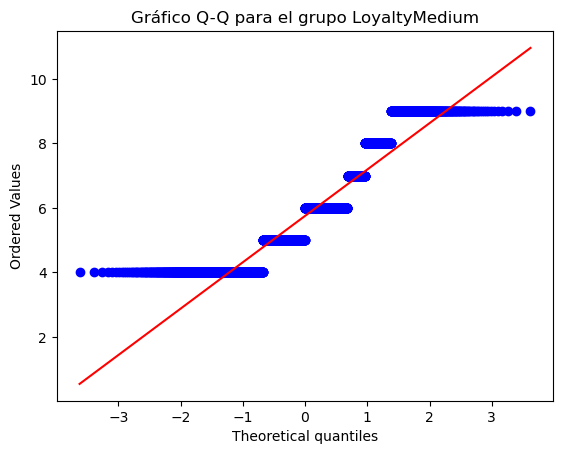

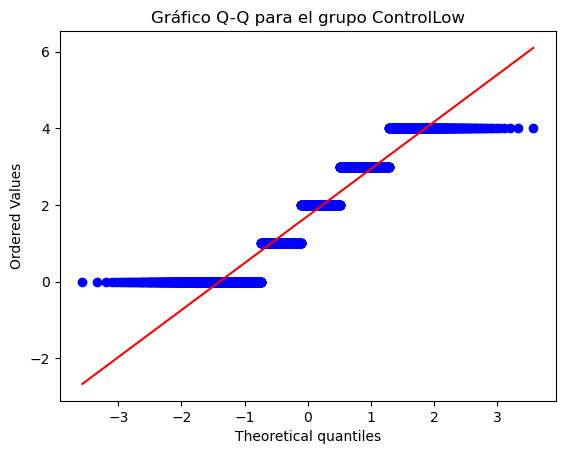

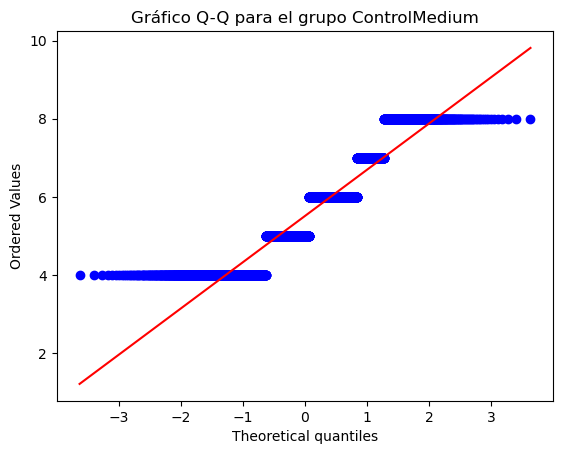

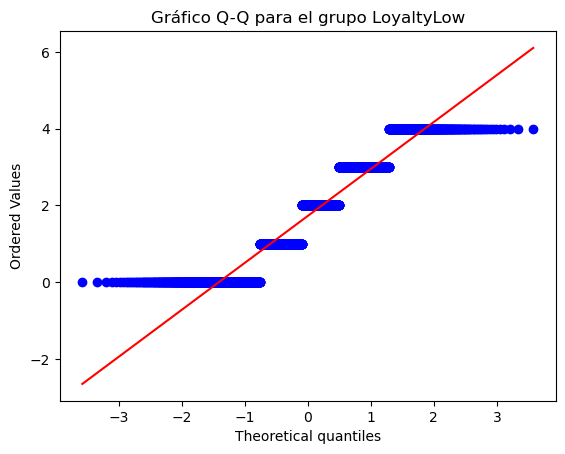

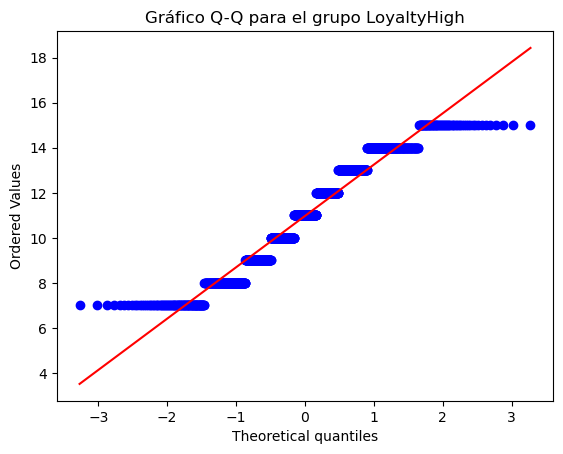

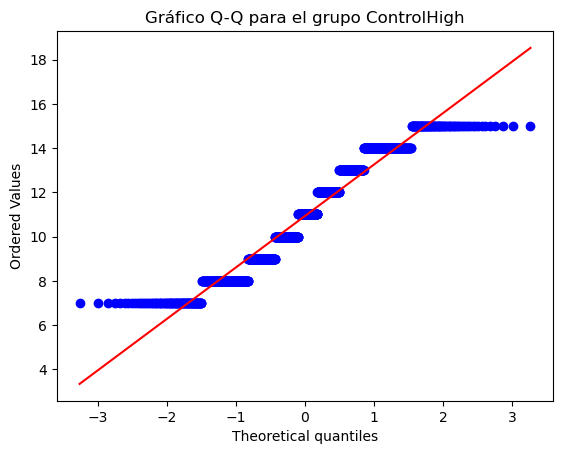

In [24]:
# Generar gráficos Q-Q para cada grupo
for group in data['Controlgroup'].unique():
    stats.probplot(data[data['Controlgroup'] == group]['Trips'], dist="norm", plot=plt)
    plt.title(f'Gráfico Q-Q para el grupo {group}')
    plt.show()